In [1]:
# classification dataset
from sklearn.datasets import make_classification

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)

In [3]:
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [4]:
# evaluate lda with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [5]:
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]
model = Pipeline(steps=steps)

In [6]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [7]:
# report peroformnace
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.314 (0.049)


In [8]:
# compare lda number of componants with naive bayes algorithm for classification
from matplotlib import pyplot

In [9]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
    return X, y

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 10):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [11]:
# evaluate a given model using cross_validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [12]:
# define dataset
X, y = get_dataset()

In [13]:
# get the models to evaluate
models = get_models()

In [14]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


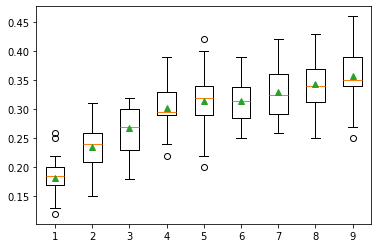

In [15]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [16]:
# make prediction using lda with naive bayes
# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())]
model = Pipeline(steps=steps)

In [17]:
# fit the model on the whole dataset
model.fit(X, y)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=9)),
                ('m', GaussianNB())])

In [18]:
# make a single prediction
row =[[2.3548775, -1.69674567, 1.6193882, -2.85422348, -2.00998376, -1.19668862,
       16.56128782, 2.57257575, 9.93779782, 0.43415008, 6.08274911, 2.12689336, 1.70100279,
       3.2160983, 13.02048541, -3.05034488, 2.06346747, -3.33390362, 2.45147541, -1.23455205]]
yhat = model.predict(row)
print('PREDICTED CLASS : %d' % yhat[0])

PREDICTED CLASS : 6
